**MNIST HANDWRITING**

Deep Learning for MNIST Handwritten Digit Classification using PyTorch.
This is an exploration task. Develop your end-to-end workflow for solving
a Handwritten Digit Classification task using Neural Network architecture
(not Convolutional Neural Network).

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

In [ ]:
# Step 1: Load MNIST dataset for the data loader
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

mnist_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_trainset, batch_size=64, shuffle=True)

mnist_testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(mnist_testset, batch_size=64, shuffle=False)


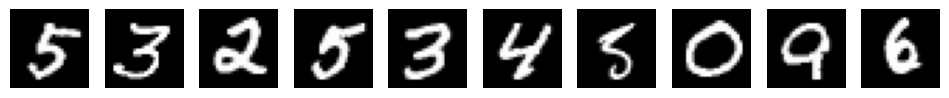

In [ ]:
# Step 2: Visualize several MNIST datasets

import matplotlib.pyplot as plt
%matplotlib inline

def plot_images(images):
  fig, axs = plt.subplots(1, len(images), figsize=(12, 6))
  for i, image in enumerate(images):
    axs[i].imshow(image.squeeze().numpy(), cmap='gray')
    axs[i].axis('off')

images, labels = next(iter(train_loader))
plot_images(images[:10])

In [ ]:
#Design your Neural Network model
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.linear1 = nn.Linear(28*28, 100)
    self.linear2 = nn.Linear(100, 50)
    self.final = nn.Linear(50, 10)
    self.relu = nn.ReLU()

  def forward(self, img):
    x = img.view(-1, 28*28)
    x = self.relu(self.linear1(x))
    x = self.relu(self.linear2(x))
    x = self.final(x)
    return x

net = Net()

In [ ]:
#Step 4: Setup your hyperparameter such as Loss Function, Optimizer, Learning Rate, etc
cross_el = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.001)
epoch = 20

In [ ]:
#Step 5: Develop a training loop and run a training mode
for epoch in range(epoch):
  net.train()
  running_loss = 0.0

  for data in train_loader:
    x, y = data
    optimizer.zero_grad()
    output = net(x.view(-1, 28*28))
    loss = cross_el(output, y)
    loss.backward()
    optimizer.step()

    running_loss += loss.item()

  print(f'[{epoch + 1}, {epoch + 1:5d}] loss : {running_loss / 2000:.5f}')

[1,     1] loss : 0.18699
[2,     2] loss : 0.09078
[3,     3] loss : 0.06730
[4,     4] loss : 0.05521
[5,     5] loss : 0.04773
[6,     6] loss : 0.04211
[7,     7] loss : 0.03756
[8,     8] loss : 0.03548
[9,     9] loss : 0.03130
[10,    10] loss : 0.02894
[11,    11] loss : 0.02721
[12,    12] loss : 0.02524
[13,    13] loss : 0.02261
[14,    14] loss : 0.02250
[15,    15] loss : 0.02091
[16,    16] loss : 0.01992
[17,    17] loss : 0.01753
[18,    18] loss : 0.01736
[19,    19] loss : 0.01592
[20,    20] loss : 0.01578


In [ ]:
# Step 6: Evaluate the Model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, f1_score

correct = 0
total = 0
all_labels = []
all_predictions = []

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        all_labels.extend(labels.numpy())
        all_predictions.extend(predicted.numpy())

accuracy = accuracy_score(all_labels, all_predictions)
confusion = confusion_matrix(all_labels, all_predictions)
classification_report_str = classification_report(all_labels, all_predictions)

print(f"Accuracy: {accuracy * 100}%")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_report_str)

Accuracy: 97.48%
Confusion Matrix:
[[ 970    1    0    0    0    0    5    1    2    1]
 [   0 1123    1    2    0    1    2    2    4    0]
 [  11    0 1000    1    2    2    4    4    8    0]
 [   0    2    6  982    0    3    0    7    7    3]
 [   4    0    2    0  941    0   11    5    1   18]
 [   4    1    1   10    0  855   13    0    5    3]
 [   5    3    1    0    1    1  946    0    1    0]
 [   1    7    7    1    0    0    1 1008    0    3]
 [   6    0    4    1    2    3    2    4  949    3]
 [   3    3    1    3   10    2    3    5    5  974]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.97      1032
           3       0.98      0.97      0.98      1010
           4       0.98      0.96      0.97       982
           5       0.99      0.96      0.97       892
           6       0.96      0.9

# Step 7: Describe and explain your Result


Dri hasil yang didapatkan  mendapatkan hasil accuracy sebesar 97,48%, yang dapat dikatakan sangat tinggi, sehingga dapat dikatakan model ini memiliki kamampuhan yang tinggi